# Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [2]:
dataset = pd.read_csv(r'./dataset/Preprocessed_Dataset.csv')

In [3]:
dataset.head()

,Location,temperature,humidity,ph,rainfall,N,P,K,label,price,Price_Date
0,Yercaud,20.879744,82.002744,6.502985,202.935536,104,23,106,rice,210,30-Apr-11
1,Vriddhachalam,21.770462,80.319644,7.038096,226.655537,125,28,194,rice,45,1-May-11
2,Virugambakkam,23.004459,82.320763,7.840207,263.964248,103,13,159,rice,70,2-May-11
3,Virudhunagar,26.491096,80.158363,6.980401,242.864034,63,9,159,rice,18,3-May-11
4,Viralimalai,20.130175,81.604873,7.628473,262.717340,54,10,159,rice,37,4-May-11


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.shape

(3100, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 11 columns):
Location       3100 non-null object
temperature    3100 non-null float64
humidity       3100 non-null float64
ph             3100 non-null float64
rainfall       3100 non-null float64
N              3100 non-null int64
P              3100 non-null int64
K              3100 non-null int64
label          3100 non-null object
price          3100 non-null int64
Price_Date     3100 non-null object
dtypes: float64(4), int64(4), object(3)
memory usage: 266.5+ KB


In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,3100.0,27.099525,7.521470,8.825675,22.905954,26.173273,29.317880,54.986760
humidity,3100.0,65.947509,23.942543,10.034048,55.277082,68.704709,84.287741,99.981876
ph,3100.0,6.368724,0.808084,3.504752,5.898330,6.348389,6.834163,9.935091
rainfall,3100.0,110.146662,63.666790,20.211267,65.362857,97.735883,140.379169,397.315380
N,3100.0,88.885161,20.729197,50.000000,69.000000,94.000000,103.000000,129.000000
P,3100.0,14.899677,10.115050,6.000000,9.000000,11.000000,18.000000,79.000000
K,3100.0,162.814516,32.693045,39.000000,149.000000,169.000000,191.000000,295.000000
price,3100.0,645.275161,478.680867,1.000000,111.000000,679.000000,1036.250000,1921.000000


In [8]:
dataset.isnull().sum()

Location       0
temperature    0
humidity       0
ph             0
rainfall       0
N              0
P              0
K              0
label          0
price          0
Price_Date     0
dtype: int64

# Data Visualization

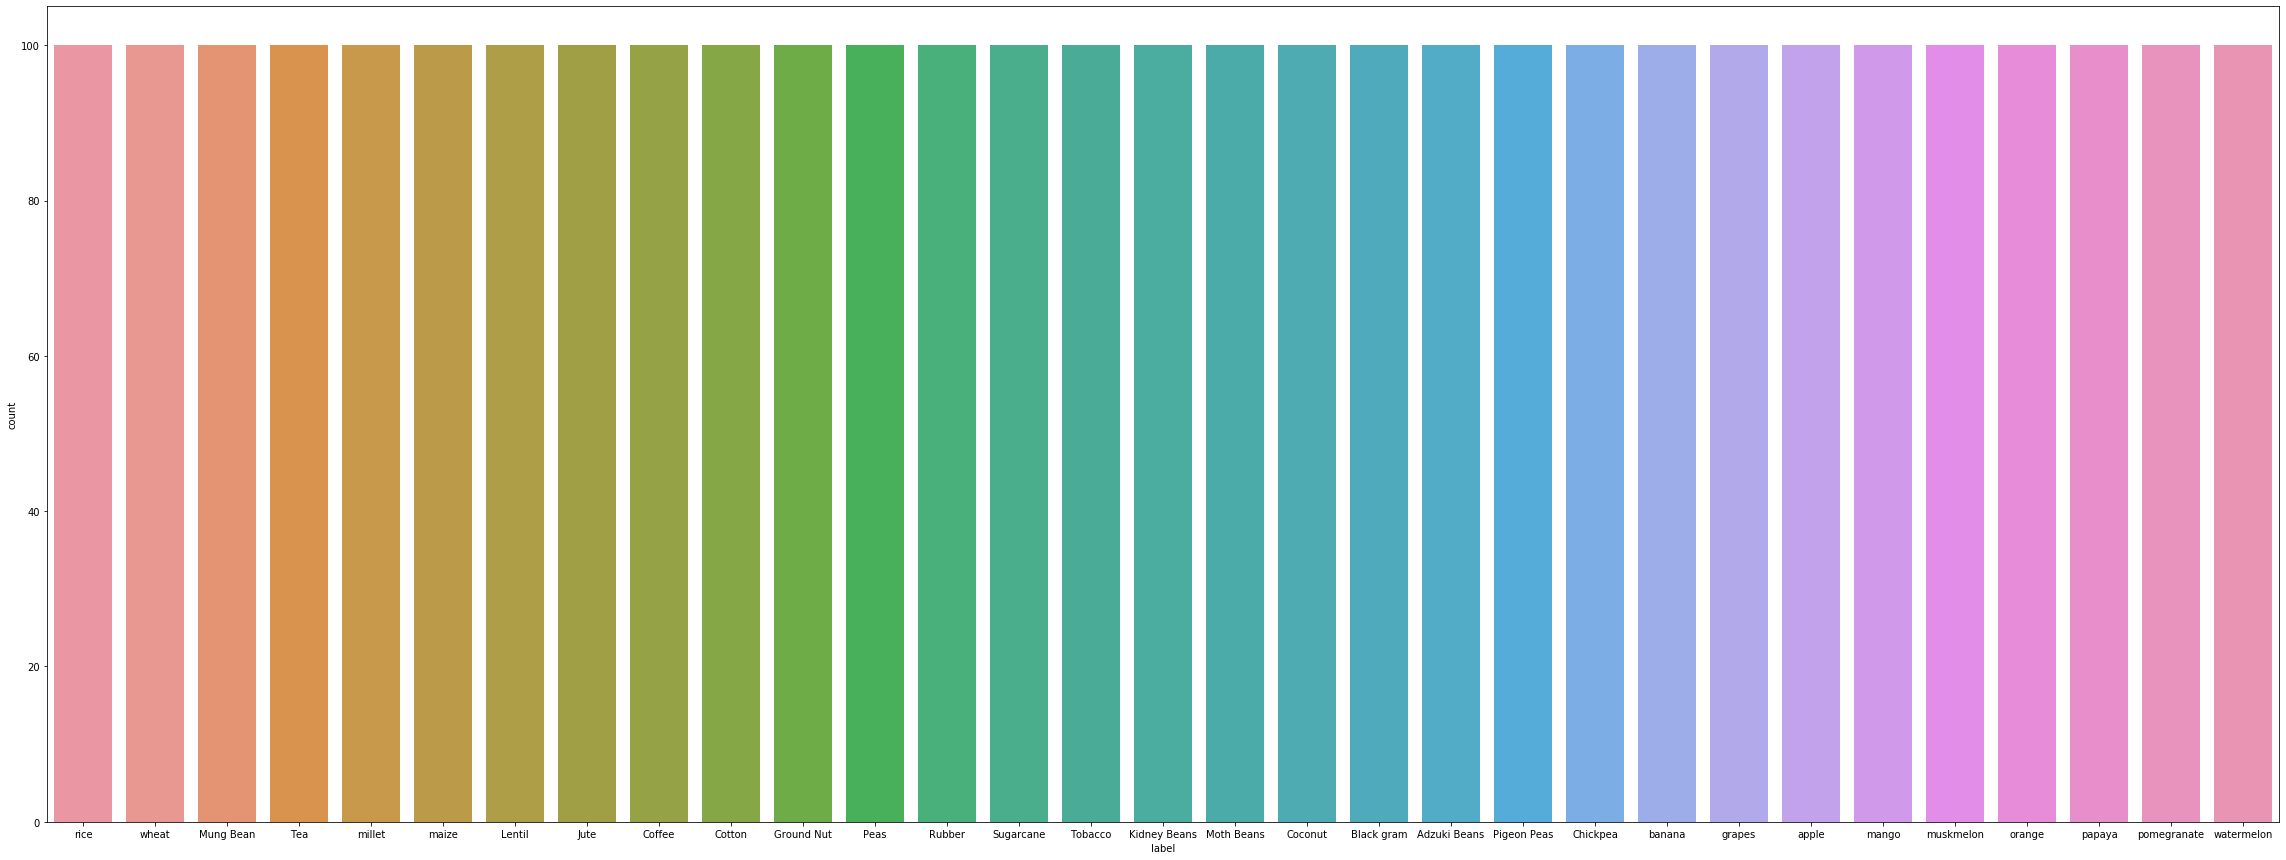

In [9]:
plt.figure(figsize = (40,15))
sns.countplot(x = 'label',data = dataset)

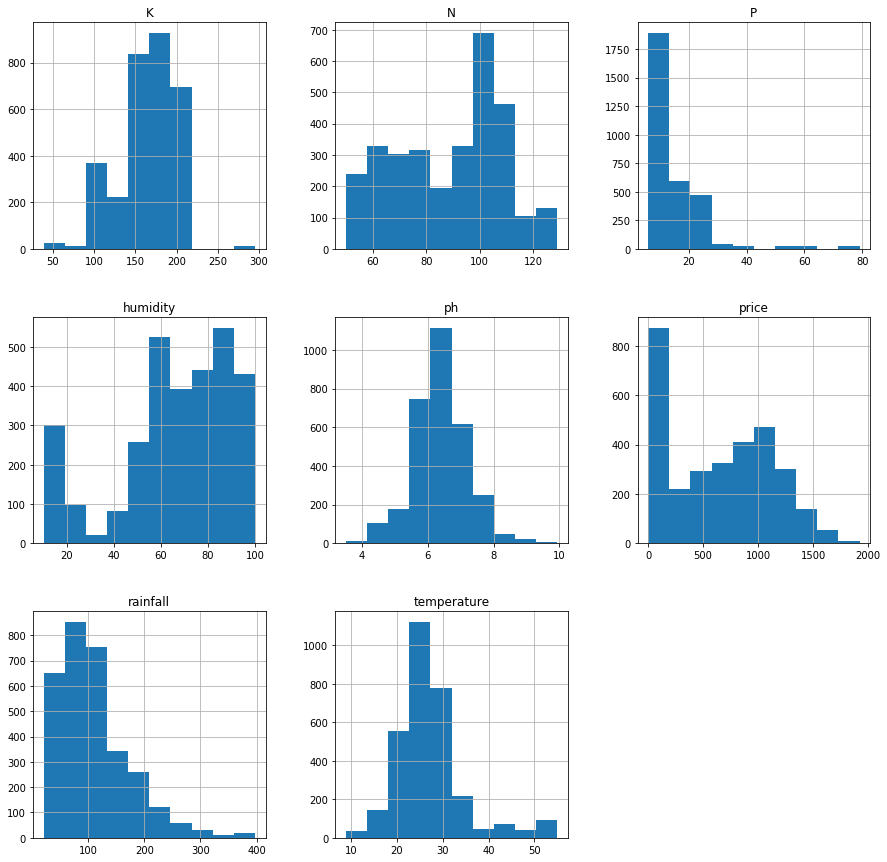

In [10]:
dataset.hist(figsize = (15,15))
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelencoder = LabelEncoder()

In [13]:
dataset['class'] = labelencoder.fit_transform(dataset['label'])
dataset.head(5)

,Location,temperature,humidity,ph,rainfall,N,P,K,label,price,Price_Date,class
0,Yercaud,20.879744,82.002744,6.502985,202.935536,104,23,106,rice,210,30-Apr-11,28
1,Vriddhachalam,21.770462,80.319644,7.038096,226.655537,125,28,194,rice,45,1-May-11,28
2,Virugambakkam,23.004459,82.320763,7.840207,263.964248,103,13,159,rice,70,2-May-11,28
3,Virudhunagar,26.491096,80.158363,6.980401,242.864034,63,9,159,rice,18,3-May-11,28
4,Viralimalai,20.130175,81.604873,7.628473,262.717340,54,10,159,rice,37,4-May-11,28


# feature selection

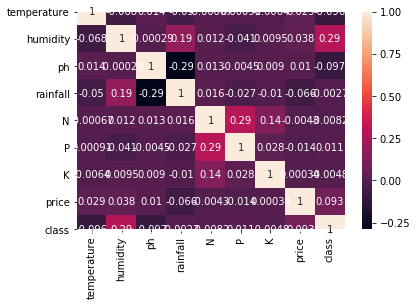

In [14]:
dataset.corr()
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [15]:
dataset.drop(['N','P','K'],1 ,inplace=True)

In [16]:
dataset

,Location,temperature,humidity,ph,rainfall,label,price,Price_Date,class
0,Yercaud,20.879744,82.002744,6.502985,202.935536,rice,210,30-Apr-11,28
1,Vriddhachalam,21.770462,80.319644,7.038096,226.655537,rice,45,1-May-11,28
2,Virugambakkam,23.004459,82.320763,7.840207,263.964248,rice,70,2-May-11,28
3,Virudhunagar,26.491096,80.158363,6.980401,242.864034,rice,18,3-May-11,28
4,Viralimalai,20.130175,81.604873,7.628473,262.717340,rice,37,4-May-11,28
...,...,...,...,...,...,...,...,...,...
3095,Tiruchirappalli (West),27.099525,89.636679,6.765095,110.146662,watermelon,192,30-Apr-14,29
3096,Tiruchirappalli (East),26.638386,84.695469,6.368724,48.324286,watermelon,400,1-May-14,29
3097,Tiruchengodu,25.331045,84.305338,6.904242,41.532187,watermelon,810,2-May-14,29
3098,Tiruchendur,26.897502,83.892415,6.463271,43.971937,watermelon,721,3-May-14,29


In [17]:
X = dataset.iloc[:, [1,2,3,4]].values
Y = dataset.iloc[:, [5]].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42 )

In [19]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2480, 4)
X_test shape: (620, 4)
Y_train shape: (2480, 1)
Y_test shape: (620, 1)


In [20]:
print(X_train)

[[ 17.19628279  13.68862614   5.97052042  53.8727743 ]
 [ 31.32720734  54.17967763   6.62167846 144.8018325 ]
 [ 30.01821337  50.0983181    5.67603258  96.08745082]
 ...
 [ 17.92114547  13.04534931   6.43169009  54.56423739]
 [ 30.85454844  70.0216622    5.42808436 219.745306  ]
 [ 26.36629861  52.25738495   7.45646037 177.3176161 ]]


#  MACHINE LEARNING ALGORITHMS

# Support Vector Classifier Algorithm

In [21]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

# Decision tree Algorithm

In [22]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

# Random forest Algorithm

In [23]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# Making predictions on test dataset

In [24]:
Y_pred_svc = svc.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

 # Model Evaluation

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [27]:
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))


Support Vector Classifier: 84.67741935483872
Decision tree: 90.64516129032259
Random Forest: 91.93548387096774


In [28]:

c=accuracy_svc * 100
d=accuracy_dectree * 100
e=accuracy_ranfor * 100


In [29]:
scores = [c,d,e]
algorithms = ["Support Vector Machine","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Support Vector Machine is: 84.67741935483872 %
The accuracy score achieved using Decision Tree is: 90.64516129032259 %
The accuracy score achieved using Random Forest is: 91.93548387096774 %


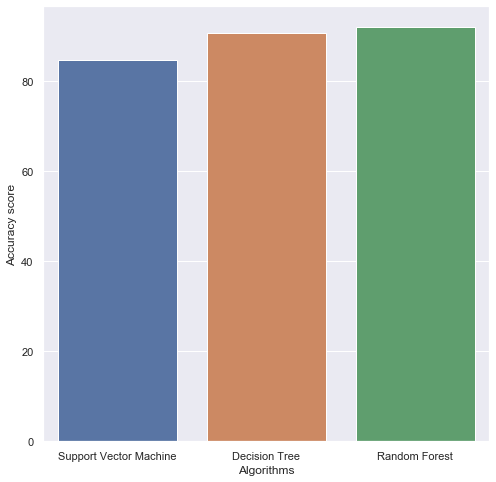

In [30]:
sns.set(rc={'figure.figsize':(8,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [31]:
import joblib 
joblib.dump(ranfor, r'Models\ranfor_model1.pkl') 
ranfor_from_joblib = joblib.load(r'Models\ranfor_model1.pkl')  
print("Model successfully created...!")

Model successfully created...!


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ranfor)

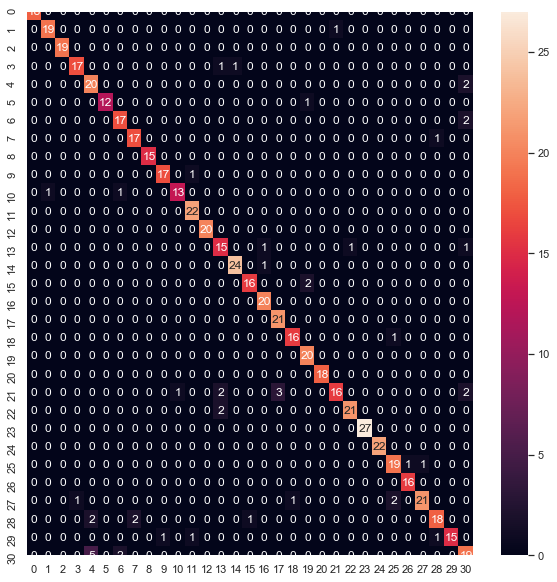

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(pd.DataFrame(cm), annot=True)

In [34]:
X1 = dataset.iloc[:, [1,2,3,4]].values
Y1 = dataset.iloc[:, [6]].values

In [35]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = 0.20, random_state = 42 )

In [36]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train1, Y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
import joblib
joblib.dump(ranfor, r'Models\ranfor_model2.pkl') 
ranfor_from_joblib = joblib.load(r'Models\ranfor_model2.pkl')  
print("Model successfully created...!")

Model successfully created...!
